In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import math

In [2]:
formulaCompressionTestHome = "C:\\Users\\jonat\\Documents\\Dataspread\\FormulaCompressionTest"

In [3]:
def display_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

def getMiscDict(path):
    dirList = path.split('\\')[::-1]
    memoryStorage = dirList[2]
    baseline = dirList[4]
    if baseline.lower() == 'comp':
        baseline = 'TACO'
    elif baseline.lower() == 'async':
        baseline = 'Antifreeze'
    elif baseline.lower() == 'pgimpl':
        baseline = 'NoComp'
    testSpreadsheet = dirList[3]
    run = dirList[1]
    return {'Memory Storage':memoryStorage, 'Baseline':baseline,
            'Test Spreadsheet':testSpreadsheet, 'Run':run}

def getMetrics(path):
    """
    Takes in a path string to a .stat file and returns a Pandas DataFrame of the file's contents
    """
    reportsFile = open(path, 'r')
    dataDict = {}
    dataDict = getMiscDict(path)
    for line in reportsFile:
        if ': ' in line:
            metric, value = line.split(": ")
            if metric not in dataDict:
                dataDict[metric] = []
            try:
                dataDict[metric].append(int(value))
            except ValueError:
                dataDict[metric].append(float(value))
            except:
                dataDict[metric].append(value)
    reportsFile.close
    
    return pd.DataFrame(dataDict)


def getAllMetrics(basePath, miscDict={'sync type':'', 'mem type':'', 'impl':'', 'test':'', 'run':0}):
    """
    Takes in a file path and searches all of its subdirectories for .stat files and returns all of
    their contents in a Pandas DataFrame
    """
    data = pd.DataFrame()
    for file in os.listdir(basePath):
        filePath = os.path.join(basePath, file)
        if os.path.isdir(filePath):
            data = data.append(getAllMetrics(filePath))
        elif file == "core.stat":
            data = data.append(getMetrics(filePath))
    return data

In [4]:
fileHome = formulaCompressionTestHome + "\\Dixin\\Realsheets\\"
report_enron = getAllMetrics(fileHome + "report_enron")
report_delete_enron = getAllMetrics(fileHome + "report_delete_enron")
report_github = getAllMetrics(fileHome + "report_github")
report_delete_github = getAllMetrics(fileHome + "report_delete_github")

report_delete_enron.to_csv('report_delete_enron.csv', index=False)
report_github.to_csv('report_github.csv', index=False)
report_delete_github.to_csv('report_delete_github.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


447910.46056653507


,index,Memory Storage,Baseline,Test Spreadsheet,Run,Total test time (ms),Number of cells to update,Number of cells updated,Total time to update cells (ms),Total time after the update (ms),Total time of getting dependents (ms),Total time of adding the batch (ms),Total time of refreshing the cache (ms),Area under curve
0,0,memOnly,TACO,enron_long1.xls,RUN1,7016.0,20847.0,0.0,1.0,0.0,1,6816.0,3.0,0.0
1,1,memOnly,TACO,enron_long1.xls,RUN2,6865.0,20847.0,0.0,2.0,0.0,1,6658.0,2.0,0.0
2,2,memOnly,TACO,enron_long1.xls,RUN3,7092.0,20847.0,0.0,1.0,0.0,1,6883.0,3.0,0.0
3,3,memOnly,NoComp,enron_long1.xls,RUN1,3755.0,20847.0,0.0,292.0,0.0,269,2921.0,0.0,0.0
4,4,memOnly,NoComp,enron_long1.xls,RUN2,3858.0,20847.0,0.0,317.0,0.0,299,3004.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,98,memOnly,TACO,github_max5.xlsx,RUN3,11576.0,131456.0,0.0,2.0,0.0,1,10992.0,2.0,0.0
112,99,memOnly,NoComp,github_max5.xlsx,RUN1,7844.0,131456.0,0.0,1295.0,0.0,1196,4606.0,1.0,0.0
113,100,memOnly,NoComp,github_max5.xlsx,RUN2,7814.0,131456.0,0.0,1320.0,0.0,1191,4505.0,0.0,0.0
114,101,memOnly,NoComp,github_max5.xlsx,RUN3,8066.0,131456.0,0.0,1341.0,0.0,1215,4716.0,0.0,0.0


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


index  Total test time (ms)  \
Baseline   Test Spreadsheet                                 
Antifreeze enron_long1.xls    107.0                   NaN   
           enron_long2.xls     13.0          25436.666667   
           enron_long3.xls     22.0         291479.666667   
           enron_max1.xls     108.0                   NaN   
           enron_max2.xls     115.0                   NaN   
           enron_max3.xls     106.0                   NaN   
           enron_max4.xls     112.0                   NaN   
           enron_max5.xls     110.0                   NaN   
           github_long1.xlsx  103.0                   NaN   
           github_long2.xlsx  109.0                   NaN   
           github_long3.xlsx  102.0                   NaN   
           github_max1.xlsx   104.0                   NaN   
           github_max2.xlsx   114.0                   NaN   
           github_max3.xlsx   105.0                   NaN   
           github_max4.xlsx   111.0                   NaN   
           github_max5.xlsx   113.0                   NaN   
NoComp     enron_long1.xls      4.0           3804.000000   
           enron_long2.xls     10.0            441.000000   
           enron_long3.xls     19.0            898.333333   
           enron_max1.xls      28.0          14951.333333   
           enron_max2.xls      34.0          36499.333333   
           enron_max3.xls      40.0          38065.666667   
           enron_max4.xls      46.0           3238.000000   
           enron_max5.xls      52.0           1557.333333   
           github_long1.xlsx   58.0           8831.333333   
           github_long2.xlsx   64.0           4376.333333   
           github_long3.xlsx   70.0           4328.000000   
           github_max1.xlsx    76.0          49370.000000   
           github_max2.xlsx    82.0          11684.666667   
           github_max3.xlsx    88.0          12717.333333   
           github_max4.xlsx    94.0           8181.666667   
           github_max5.xlsx   100.0           7908.000000   
TACO       enron_long1.xls      1.0           6991.000000   
           enron_long2.xls      7.0            458.666667   
           enron_long3.xls     16.0           1046.000000   
           enron_max1.xls      25.0          24809.000000   
           enron_max2.xls      31.0           8269.333333   
           enron_max3.xls      37.0           7271.000000   
           enron_max4.xls      43.0           9729.333333   
           enron_max5.xls      49.0           2292.000000   
           github_long1.xlsx   55.0           8203.333333   
           github_long2.xlsx   61.0           3563.333333   
           github_long3.xlsx   67.0           3193.333333   
           github_max1.xlsx    73.0          85458.333333   
           github_max2.xlsx    79.0           9354.666667   
           github_max3.xlsx    85.0          12659.333333   
           github_max4.xlsx    91.0           8158.666667   
           github_max5.xlsx    97.0          12063.333333   

                              Number of cells to update  \
Baseline   Test Spreadsheet                               
Antifreeze enron_long1.xls                          NaN   
           enron_long2.xls                       4291.0   
           enron_long3.xls                       4382.0   
           enron_max1.xls                           NaN   
           enron_max2.xls                           NaN   
           enron_max3.xls                           NaN   
           enron_max4.xls                           NaN   
           enron_max5.xls                           NaN   
           github_long1.xlsx                        NaN   
           github_long2.xlsx                        NaN   
           github_long3.xlsx                        NaN   
           github_max1.xlsx                         NaN   
           github_max2.xlsx                         NaN   
           github_max3.xlsx                         NaN   
           github_max4.xlsx        

<Figure size 1440x864 with 0 Axes>

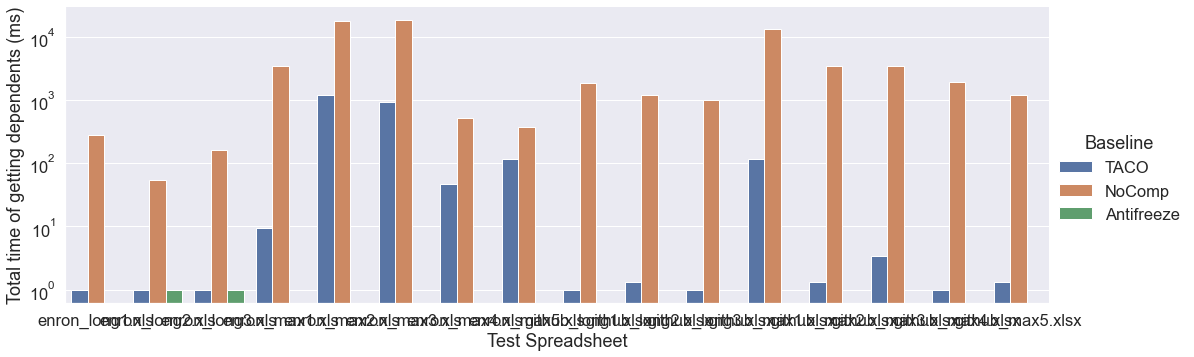

<Figure size 1440x864 with 0 Axes>

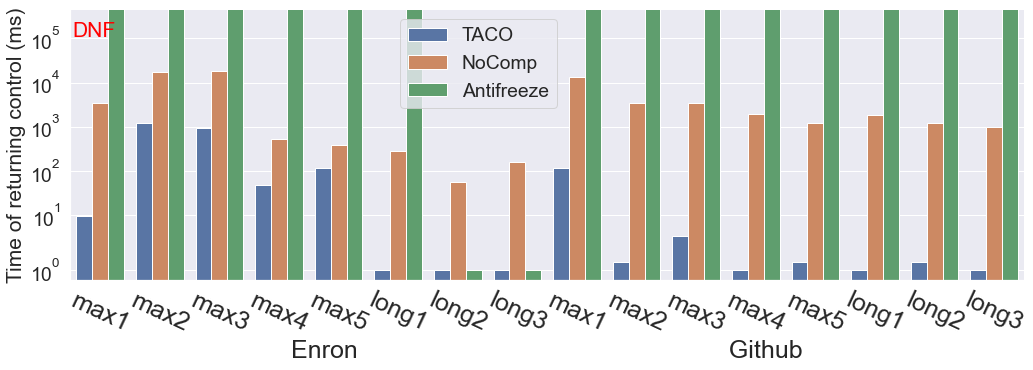

In [41]:
#fig1: MemOnly setup, time of returning control for three approaches, and 16 files
#Time to return control
#get rid of x title
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_enron.append(report_github)
report = report[report['Memory Storage'] == 'memOnly']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 15
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of getting dependents (ms)':10**6}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
report[['Memory Storage','Baseline','Test Spreadsheet','Total time of getting dependents (ms)']]
display(report)
t1 = report.iloc[25:60]
t2 = report.iloc[0:25]
t3 = report.iloc[81:]
t4 = report.iloc[60:81]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(ymin,ymax), ylabel='Time of returning control (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.52,1))
plt.text(-.46,110000,'DNF',color='red')

report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of getting dependents (ms)']].to_csv('fig1.csv', index=False)
report = report.groupby(['Baseline', 'Test Spreadsheet']).mean()
display(report)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


5880784.878906422


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x864 with 0 Axes>

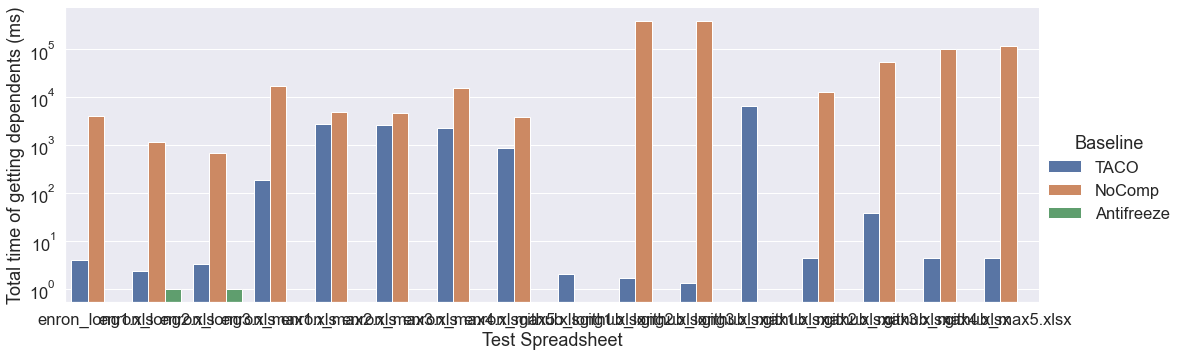

<Figure size 1440x864 with 0 Axes>

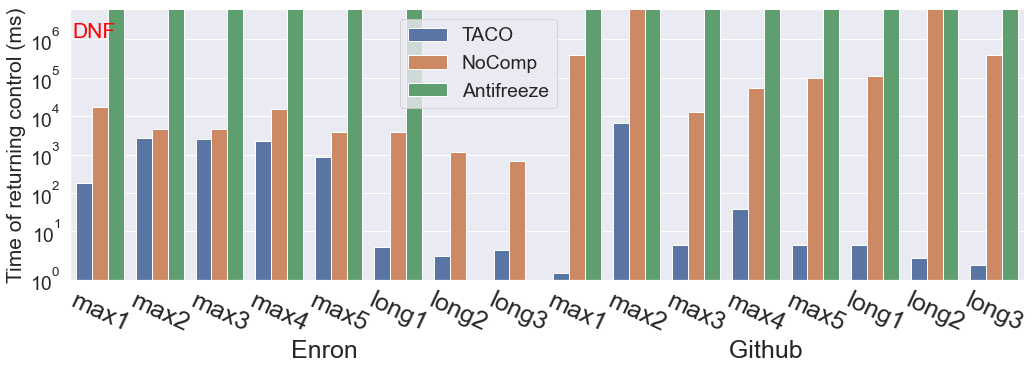

In [6]:
#fig2: DB setup, time of returning control for three approaches, and 16 files (db_return_control.pdf)
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_enron.append(report_github)
report = report[report['Memory Storage'] == 'DB']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 8
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of getting dependents (ms)':10**8}, ignore_index=True)
    if 'NoComp' not in temp['Baseline'].values:
        report = report.append({'Baseline':'NoComp', 'Test Spreadsheet':sheet, 'Total time of getting dependents (ms)':10**8}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
#display_full(report)
t1 = report.iloc[25:59]
t2 = report.iloc[0:25]
t3 = report.iloc[78:]
t4 = report.iloc[59:78]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(1,ymax), ylabel='Time of returning control (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.52,1))
plt.text(-.46,1100000,'DNF',color='red')
report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of getting dependents (ms)']].to_csv('fig2.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


628098.8170779273


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x864 with 0 Axes>

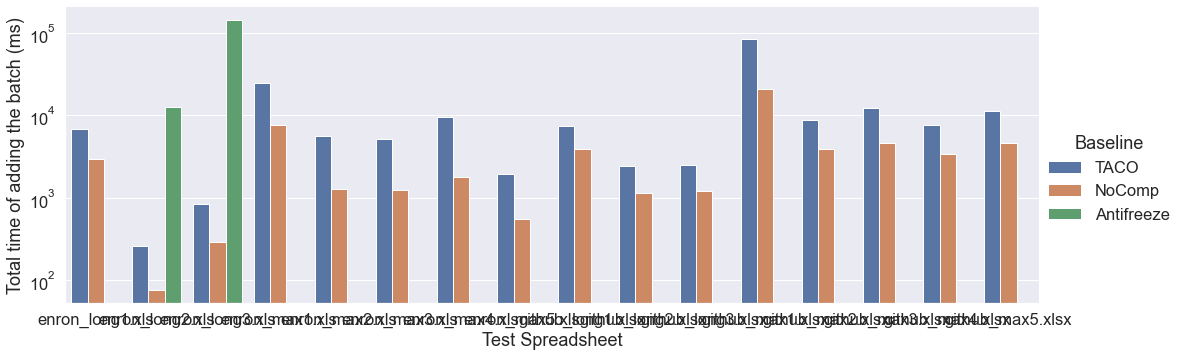

<Figure size 1440x864 with 0 Axes>

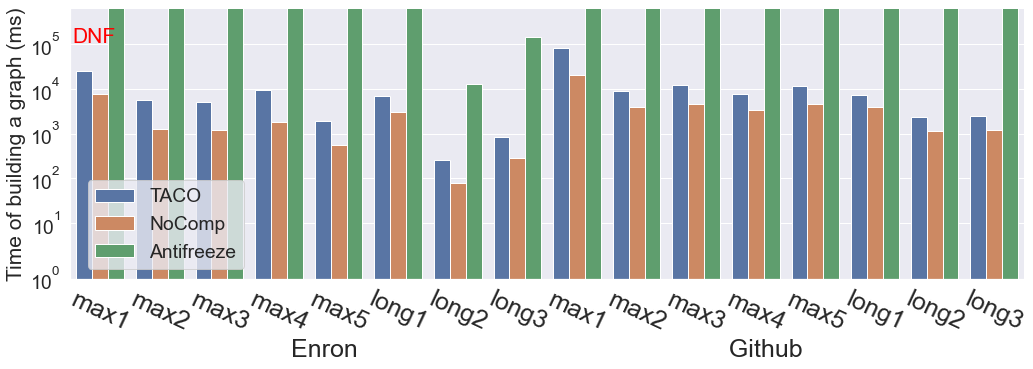

In [7]:
#fig3: MemOnly setup, time of building a graph for three approaches, and 16 files (mem_build_graph.pdf)
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_enron.append(report_github)
report = report[report['Memory Storage'] == 'memOnly']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of adding the batch (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 3
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of adding the batch (ms)':10**6}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
#display_full(report)
t1 = report.iloc[25:60]
t2 = report.iloc[0:24]
t3 = report.iloc[81:]
t4 = report.iloc[60:81]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of adding the batch (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(1,ymax), ylabel='Time of building a graph (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.1,.2), loc='center')
plt.text(-.46,110000,'DNF',color='red')
report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of adding the batch (ms)']].to_csv('fig3.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


9776830.801696315


,index,Memory Storage,Baseline,Test Spreadsheet,Run,Total test time (ms),Number of cells to update,Number of cells updated,Total time to update cells (ms),Total time after the update (ms),Total time of getting dependents (ms),Total time of adding the batch (ms),Total time of refreshing the cache (ms),Area under curve
0,0,DB,TACO,enron_long1.xls,RUN1,7221.0,20847.0,0.0,5.0,0.0,4.0,6977,12.0,0.0
1,1,DB,TACO,enron_long1.xls,RUN2,7839.0,20847.0,0.0,5.0,0.0,4.0,7617,12.0,0.0
2,2,DB,TACO,enron_long1.xls,RUN3,7778.0,20847.0,0.0,5.0,0.0,4.0,7558,11.0,0.0
3,3,DB,NoComp,enron_long1.xls,RUN1,371354.0,20847.0,0.0,4101.0,0.0,4078.0,362726,0.0,0.0
4,4,DB,NoComp,enron_long1.xls,RUN2,398471.0,20847.0,0.0,4268.0,0.0,4245.0,389441,0.0,0.0
5,5,DB,NoComp,enron_long1.xls,RUN3,434783.0,20847.0,0.0,3505.0,0.0,3476.0,427277,0.0,0.0
6,103,NaN,Antifreeze,enron_long1.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000000,NaN,NaN
7,6,DB,TACO,enron_long2.xls,RUN1,485.0,4291.0,0.0,4.0,0.0,3.0,282,4.0,0.0
8,7,DB,TACO,enron_long2.xls,RUN2,495.0,4291.0,0.0,3.0,0.0,2.0,287,4.0,0.0
9,8,DB,TACO,enron_long2.xls,RUN3,500.0,4291.0,0.0,3.0,0.0,2.0,292,4.0,0.0


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x864 with 0 Axes>

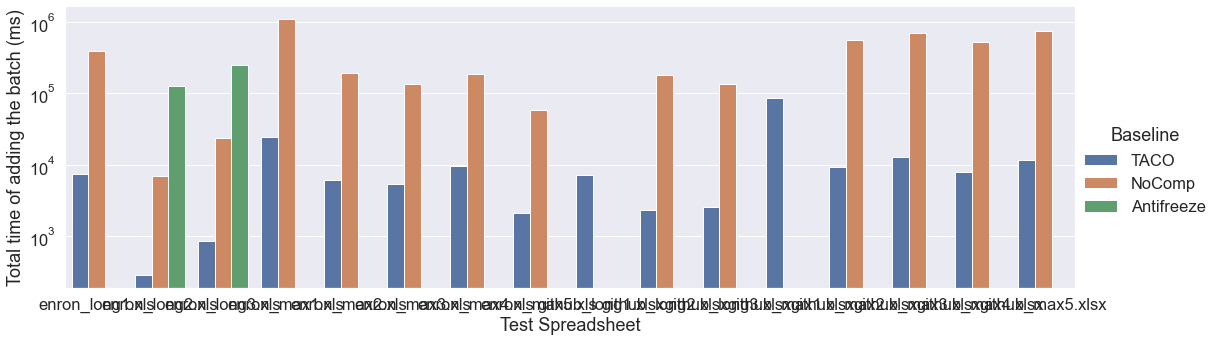

<Figure size 1440x864 with 0 Axes>

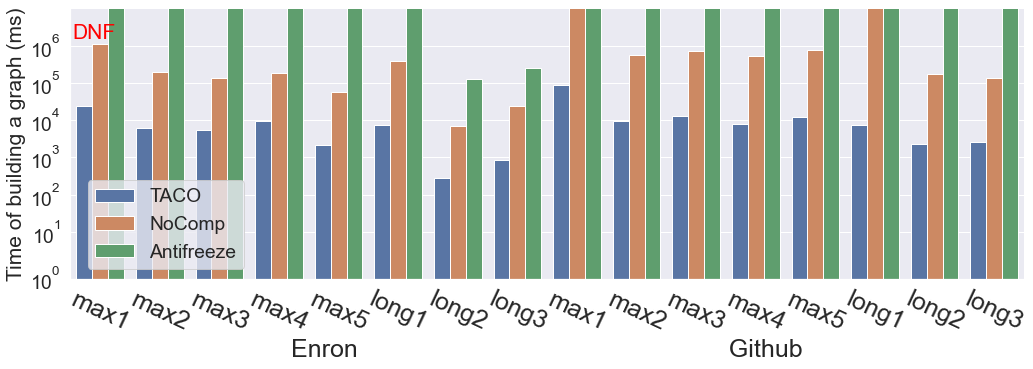

In [8]:
#fig4: DB setup, time of building a graph for three approaches, and 16 files (db_build_graph.pdf)
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_enron.append(report_github)
report = report[report['Memory Storage'] == 'DB']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of adding the batch (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 6
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of adding the batch (ms)':10**9}, ignore_index=True)
    if 'NoComp' not in temp['Baseline'].values:
        report = report.append({'Baseline':'NoComp', 'Test Spreadsheet':sheet, 'Total time of adding the batch (ms)':10**9}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
display_full(report)
t1 = report.iloc[25:60]
t2 = report.iloc[0:25]
t3 = report.iloc[79:]
t4 = report.iloc[60:79]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of adding the batch (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(1,ymax), ylabel='Time of building a graph (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.1,.2), loc='center')
plt.text(-.46,1500000,'DNF',color='red')
report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of adding the batch (ms)']].to_csv('fig4.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


282802.75026661885


,index,Memory Storage,Baseline,Test Spreadsheet,Run,Total test time (ms),Number of cells to update,Number of cells updated,Total time to update cells (ms),Total time after the update (ms),Total time of getting dependents (ms),Total time of adding the batch (ms),Total time of refreshing the cache (ms),Area under curve
0,0,memOnly,TACO,enron_long1.xls,RUN1,8036.0,20844.0,0.0,76.0,0.0,1.0,7711.0,74,0.0
1,1,memOnly,TACO,enron_long1.xls,RUN2,7105.0,20844.0,0.0,42.0,0.0,1.0,6832.0,40,0.0
2,2,memOnly,TACO,enron_long1.xls,RUN3,7081.0,20844.0,0.0,41.0,0.0,1.0,6805.0,39,0.0
3,3,memOnly,NoComp,enron_long1.xls,RUN1,3550.0,20844.0,0.0,36.0,0.0,1.0,2967.0,35,0.0
4,4,memOnly,NoComp,enron_long1.xls,RUN2,3600.0,20844.0,0.0,36.0,0.0,1.0,3031.0,35,0.0
5,5,memOnly,NoComp,enron_long1.xls,RUN3,3446.0,20844.0,0.0,32.0,0.0,1.0,2854.0,31,0.0
6,107,NaN,Antifreeze,enron_long1.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000,NaN
7,6,memOnly,TACO,enron_long2.xls,RUN1,533.0,4291.0,0.0,51.0,0.0,1.0,262.0,50,0.0
8,7,memOnly,TACO,enron_long2.xls,RUN2,508.0,4291.0,0.0,46.0,0.0,1.0,241.0,45,0.0
9,8,memOnly,TACO,enron_long2.xls,RUN3,556.0,4291.0,0.0,48.0,1.0,1.0,261.0,48,0.0


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x864 with 0 Axes>

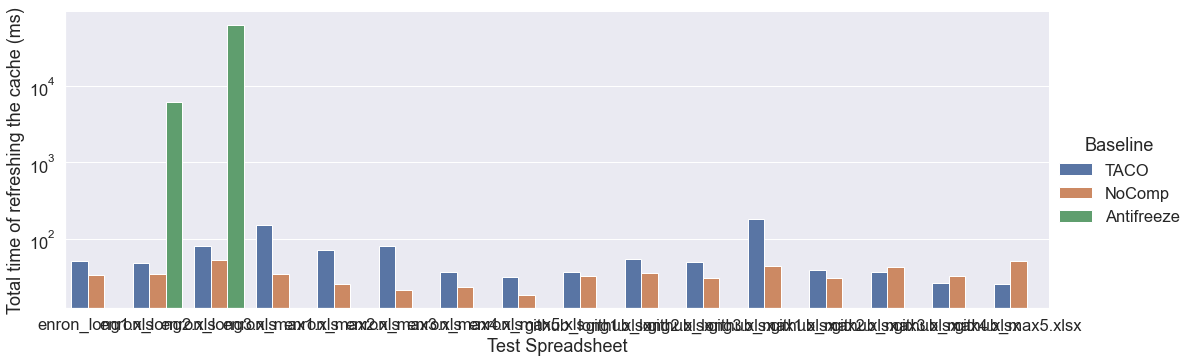

<Figure size 1440x864 with 0 Axes>

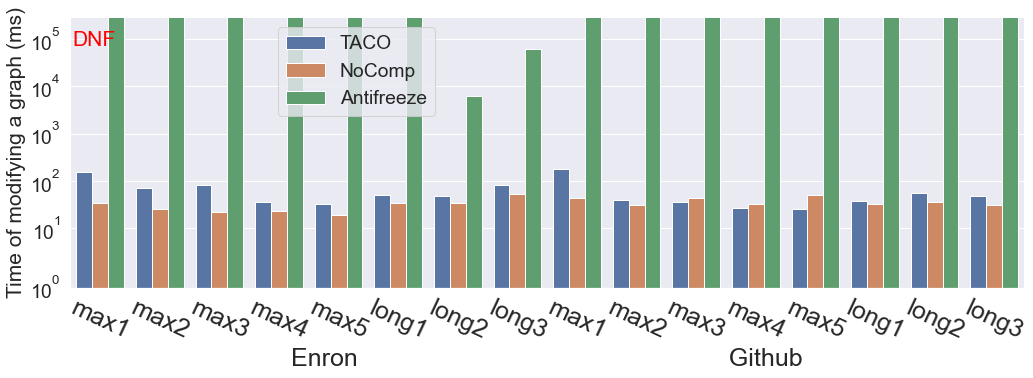

In [9]:
#fig5: MemOnly setup, time of modifying a graph for three approaches, and 16 files (mem_modify_graph.pdf)
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_delete_enron.append(report_delete_github)
report = report[report['Memory Storage'] == 'memOnly']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of refreshing the cache (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 3
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of refreshing the cache (ms)':10**7}, ignore_index=True)
    if 'NoComp' not in temp['Baseline'].values:
        report = report.append({'Baseline':'NoComp', 'Test Spreadsheet':sheet, 'Total time of refreshing the cache (ms)':10**8}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
display_full(report)
t1 = report.iloc[25:60]
t2 = report.iloc[0:25]
t3 = report.iloc[81:]
t4 = report.iloc[60:81]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of refreshing the cache (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(1,ymax), ylabel='Time of modifying a graph (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.3,.8), loc='center')
plt.text(-.46,70000,'DNF',color='red')
report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of refreshing the cache (ms)']].to_csv('fig5.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


2802552.0137718823


,index,Memory Storage,Baseline,Test Spreadsheet,Run,Total test time (ms),Number of cells to update,Number of cells updated,Total time to update cells (ms),Total time after the update (ms),Total time of getting dependents (ms),Total time of adding the batch (ms),Total time of refreshing the cache (ms),Area under curve
0,0,DB,TACO,enron_long1.xls,RUN1,7131.0,20844.0,0.0,58.0,0.0,1.0,6822.0,55,0.0
1,1,DB,TACO,enron_long1.xls,RUN2,8020.0,20844.0,0.0,55.0,0.0,2.0,7722.0,53,0.0
2,2,DB,TACO,enron_long1.xls,RUN3,8146.0,20844.0,0.0,49.0,0.0,1.0,7832.0,47,0.0
3,3,DB,NoComp,enron_long1.xls,RUN1,450200.0,20844.0,0.0,929.0,0.0,1.0,444498.0,927,0.0
4,4,DB,NoComp,enron_long1.xls,RUN2,401072.0,20844.0,0.0,1659.0,0.0,3.0,395600.0,1654,0.0
5,5,DB,NoComp,enron_long1.xls,RUN3,439066.0,20844.0,0.0,974.0,0.0,1.0,433890.0,972,0.0
6,103,NaN,Antifreeze,enron_long1.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000,NaN
7,6,DB,TACO,enron_long2.xls,RUN1,559.0,4291.0,0.0,42.0,0.0,1.0,282.0,41,0.0
8,7,DB,TACO,enron_long2.xls,RUN2,575.0,4291.0,0.0,42.0,0.0,1.0,296.0,41,0.0
9,8,DB,TACO,enron_long2.xls,RUN3,571.0,4291.0,0.0,41.0,0.0,1.0,295.0,40,0.0


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x864 with 0 Axes>

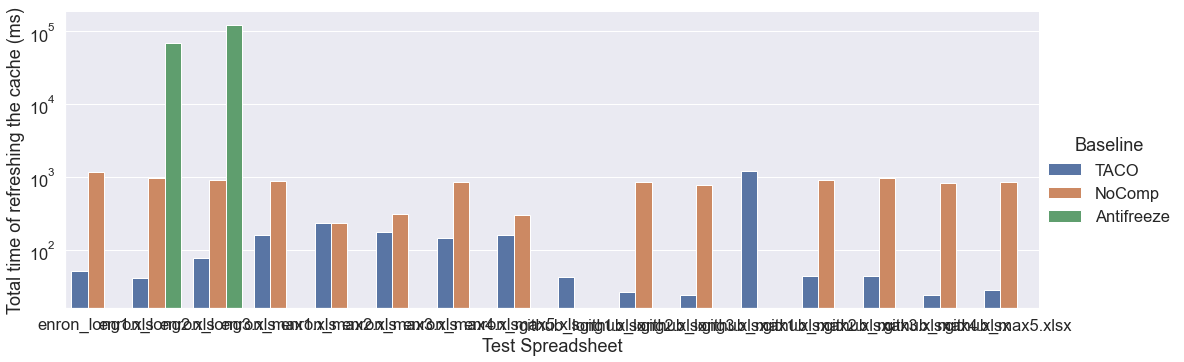

<Figure size 1440x864 with 0 Axes>

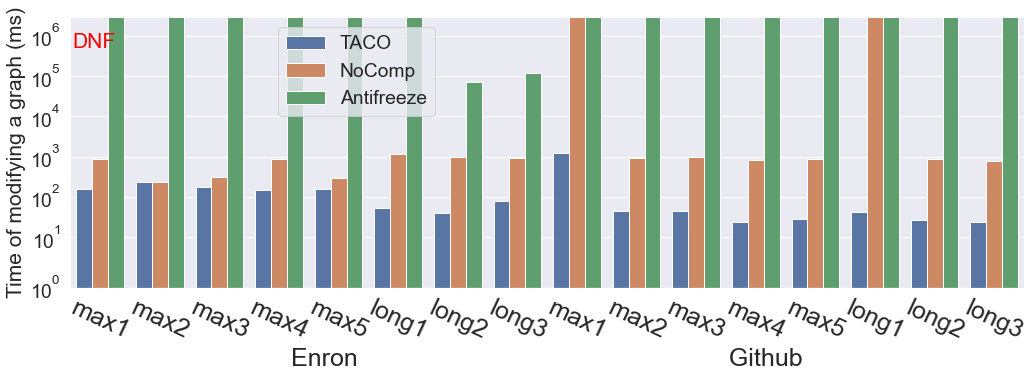

In [10]:
#fig6: DB setup, time of modifying a graph for three approaches, and 16 files (db_modify_graph.pdf)
plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_delete_enron.append(report_delete_github)
report = report[report['Memory Storage'] == 'DB']
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of refreshing the cache (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1] * 15
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)

for sheet in set(report['Test Spreadsheet'].values):
    temp = report[report['Test Spreadsheet'] == sheet]
    if 'Antifreeze' not in temp['Baseline'].values:
        report = report.append({'Baseline':'Antifreeze', 'Test Spreadsheet':sheet, 'Total time of refreshing the cache (ms)':10**7}, ignore_index=True)
    if 'NoComp' not in temp['Baseline'].values:
        report = report.append({'Baseline':'NoComp', 'Test Spreadsheet':sheet, 'Total time of refreshing the cache (ms)':10**8}, ignore_index=True)

plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
display_full(report)
t1 = report.iloc[25:60]
t2 = report.iloc[0:25]
t3 = report.iloc[79:]
t4 = report.iloc[60:79]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of refreshing the cache (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(1,ymax), ylabel='Time of modifying a graph (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.3,.8), loc='center')
plt.text(-.46,500000,'DNF',color='red')
report[['Memory Storage','Baseline','Test Spreadsheet','Run','Total time of refreshing the cache (ms)']].to_csv('fig6.csv', index=False)

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


3562887.8156004003


,Baseline,Test Spreadsheet,Total time of getting dependents (ms)
0,TACO,enron_long1.xls,1
1,TACO,enron_long1.xls,1
2,TACO,enron_long1.xls,1
3,TACO,enron_long2.xls,1
4,TACO,enron_long2.xls,1
...,...,...,...
59,Excel,github_max4.xlsx,1114
60,Excel,github_long2.xlsx,1737047
61,Excel,github_max5.xlsx,10000000000
62,Excel,github_long1.xlsx,10000000000


C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


index  Total time of getting dependents (ms)
Baseline Test Spreadsheet                                               
Excel    enron_long1.xls     53.0                           1.370830e+05
         enron_long2.xls     54.0                           4.963000e+03
         enron_long3.xls     55.0                           1.600000e+01
         enron_max1.xls      48.0                           4.480200e+04
         enron_max2.xls      49.0                           1.830000e+02
         enron_max3.xls      50.0                           1.250000e+02
         enron_max4.xls      51.0                           1.979000e+03
         enron_max5.xls      52.0                           2.920000e+02
         github_long1.xlsx   62.0                           1.000000e+10
         github_long2.xlsx   60.0                           1.737047e+06
         github_long3.xlsx   63.0                           1.000000e+10
         github_max1.xlsx    56.0                           6.623400e+04
         github_max2.xlsx    57.0                           2.151000e+03
         github_max3.xlsx    58.0                           1.370000e+03
         github_max4.xlsx    59.0                           1.114000e+03
         github_max5.xlsx    61.0                           1.000000e+10
TACO     enron_long1.xls      1.0                           1.000000e+00
         enron_long2.xls      4.0                           1.000000e+00
         enron_long3.xls      7.0                           1.000000e+00
         enron_max1.xls      10.0                           9.333333e+00
         enron_max2.xls      13.0                           1.194000e+03
         enron_max3.xls      16.0                           9.326667e+02
         enron_max4.xls      19.0                           4.733333e+01
         enron_max5.xls      22.0                           1.173333e+02
         github_long1.xlsx   25.0                           1.000000e+00
         github_long2.xlsx   28.0                           1.333333e+00
         github_long3.xlsx   31.0                           1.000000e+00
         github_max1.xlsx    34.0                           1.146667e+02
         github_max2.xlsx    37.0                           1.333333e+00
         github_max3.xlsx    40.0                           3.333333e+00
         github_max4.xlsx    43.0                           1.000000e+00
         github_max5.xlsx    46.0                           1.333333e+00

<Figure size 1440x864 with 0 Axes>

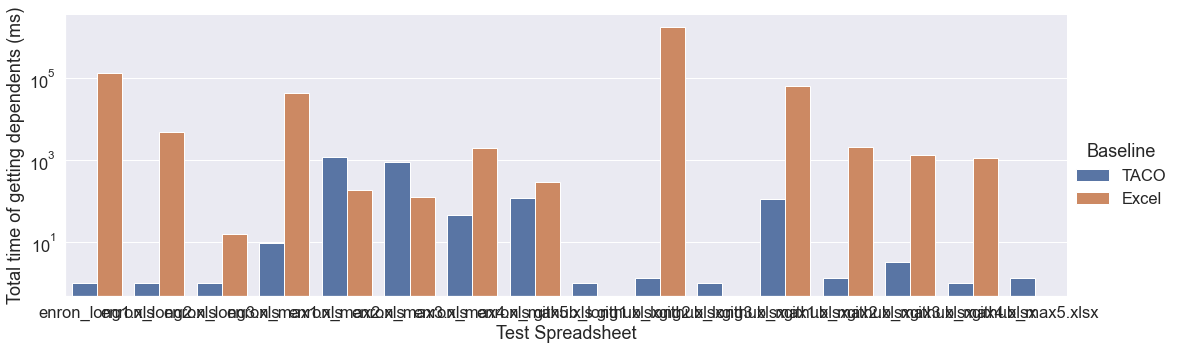

<Figure size 1440x864 with 0 Axes>

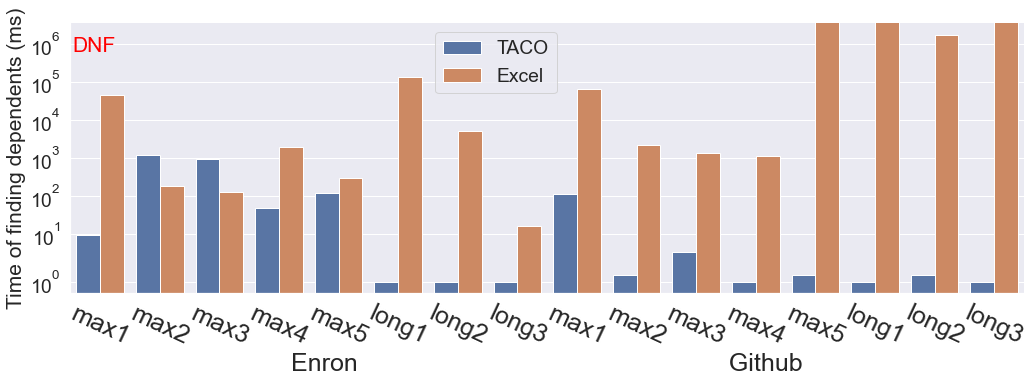

In [40]:
# TACO vs Excel

plt.figure()
sns.set(rc = {'figure.figsize':(20,12)})
report = report_enron.append(report_github)
report = report[report['Memory Storage'] == 'memOnly']
report = report[report['Baseline'] == 'TACO']
report = report[['Baseline', 'Test Spreadsheet', 'Total time of getting dependents (ms)']]
sns.set(font_scale=1.5)
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_max1.xls', 
                        'Total time of getting dependents (ms)':44802}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_max2.xls', 
                        'Total time of getting dependents (ms)':183}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_max3.xls', 
                        'Total time of getting dependents (ms)':125}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_max4.xls', 
                        'Total time of getting dependents (ms)':1979}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_max5.xls', 
                        'Total time of getting dependents (ms)':292}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_long1.xls', 
                        'Total time of getting dependents (ms)':137083}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_long2.xls', 
                        'Total time of getting dependents (ms)':4963}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'enron_long3.xls', 
                        'Total time of getting dependents (ms)':16}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_max1.xlsx', 
                        'Total time of getting dependents (ms)':66234}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_max2.xlsx', 
                        'Total time of getting dependents (ms)':2151}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_max3.xlsx', 
                        'Total time of getting dependents (ms)':1370}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_max4.xlsx', 
                        'Total time of getting dependents (ms)':1114}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_long2.xlsx', 
                        'Total time of getting dependents (ms)':1737047}, ignore_index=True)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3)
g.set(yscale='log')
ymax = g.axes[0,0].get_ylim()[1]
ymin = g.axes[0,0].get_ylim()[0]
print(ymax)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_max5.xlsx', 
                        'Total time of getting dependents (ms)':10**10}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_long1.xlsx', 
                        'Total time of getting dependents (ms)':10**10}, ignore_index=True)
report = report.append({'Baseline':'Excel', 
                        'Test Spreadsheet':'github_long3.xlsx', 
                        'Total time of getting dependents (ms)':10**10}, ignore_index=True)
display(report)


plt.figure()
report.sort_values(by=['Test Spreadsheet', 'Baseline'], ascending=[True, False], inplace=True)
report = report.reset_index()
#display_full(report)
t1 = report.iloc[12:32]
t2 = report.iloc[0:12]
t3 = report.iloc[44:]
t4 = report.iloc[32:44]
report = t1.append(t2).append(t3).append(t4)
sns.set(font_scale=1.75)
g = sns.catplot(data=report, 
                kind='bar', 
                x='Test Spreadsheet', 
                y='Total time of getting dependents (ms)', 
                hue='Baseline',
                ci=None, 
                size=5, 
                aspect=3,
                legend=False)
g.set(yscale='symlog', ylim=(ymin,ymax), ylabel='Time of finding dependents (ms)')
g.set_xticklabels(['max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3', 'max1', 'max2', 'max3', 'max4', 'max5', 'long1', 'long2', 'long3'], fontsize=25)
plt.xticks(rotation=-25)
plt.xlabel('Enron                                                     Github', fontsize=25)
plt.legend(title=None, bbox_to_anchor=(.52,1))
plt.text(-.46,600000,'DNF',color='red')

report = report.groupby(['Baseline', 'Test Spreadsheet']).mean()
display(report)